In [1]:
from multiprocessing import cpu_count
from pathlib import Path
from typing import List, Union, AnyStr
from math import pi
import pickle

import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import model_selection
from tqdm import tqdm
import torch_optimizer
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import random

import torch_burn as tb
import utils

In [2]:
tb.seed_everything(0)

In [3]:
DATA_DIR = Path('data/1116')
TEST_FILES = sorted(list(DATA_DIR.glob('*scene3_1.csv')))

# 예측 결과 불러오기

In [5]:
def load_result(checkpoint_dir):
    d = Path(checkpoint_dir)
    X = np.load(d / 'result-X.npy')
    Y = np.load(d / 'result-Y.npy')
    P = np.load(d / 'result-P.npy')
    return X, Y, P

In [28]:
CLSTMC_X, CLSTMC_Y, CLSTMC_P = load_result('checkpoint/1130-Scene3-CLSTMC-X60')

In [29]:
CLSTMC4_X, CLSTMC4_Y, CLSTMC4_P = load_result('checkpoint/1130-Scene3-CLSTMC4-X60')

In [30]:
ResNet15_X, ResNet15_Y, ResNet15_P = load_result('checkpoint/1130-Scene3-ResNet15-X60')

In [31]:
j = 0

In [32]:
CLSTMC_P[S:S+L, 0].shape

(300,)

# 예측결과 출력

## L=300

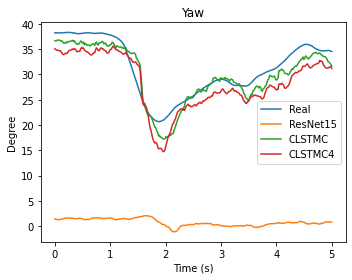

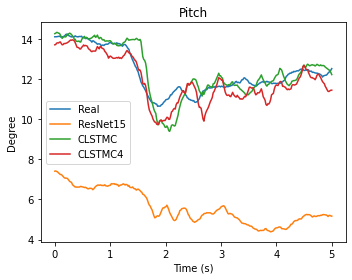

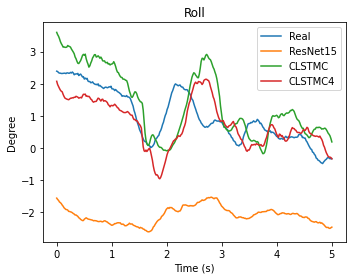

In [63]:
S = 60 * j
j += 1
L = 300
height = 5
width = 4

T = np.linspace(0, L / 60, L)

plt.figure(figsize=(height, width))
plt.plot(T, ResNet15_Y[S:S+L, 0])
plt.plot(T, ResNet15_P[S:S+L, 0])
plt.plot(T, CLSTMC_P[S:S+L, 0])
plt.plot(T, CLSTMC4_P[S:S+L, 0])
plt.legend(['Real', 'ResNet15', 'CLSTMC', 'CLSTMC4'])
plt.xlabel('Time (s)')
plt.ylabel('Degree')
plt.title('Yaw')
plt.tight_layout()
plt.savefig('img/1130/TrainingResult_300-Yaw.png')
plt.show()

plt.figure(figsize=(height, width))
plt.plot(T, ResNet15_Y[S:S+L, 1])
plt.plot(T, ResNet15_P[S:S+L, 1])
plt.plot(T, CLSTMC_P[S:S+L, 1])
plt.plot(T, CLSTMC4_P[S:S+L, 1])
plt.legend(['Real', 'ResNet15', 'CLSTMC', 'CLSTMC4'])
plt.xlabel('Time (s)')
plt.ylabel('Degree')
plt.title('Pitch')
plt.tight_layout()
plt.savefig('img/1130/TrainingResult_300-Pitch.png')
plt.show()

plt.figure(figsize=(height, width))
plt.plot(T, ResNet15_Y[S:S+L, 2])
plt.plot(T, ResNet15_P[S:S+L, 2])
plt.plot(T, CLSTMC_P[S:S+L, 2])
plt.plot(T, CLSTMC4_P[S:S+L, 2])
plt.legend(['Real', 'ResNet15', 'CLSTMC', 'CLSTMC4'])
plt.xlabel('Time (s)')
plt.ylabel('Degree')
plt.title('Roll')
plt.tight_layout()
plt.savefig('img/1130/TrainingResult_300-Roll.png')
plt.show()

# L = 1000

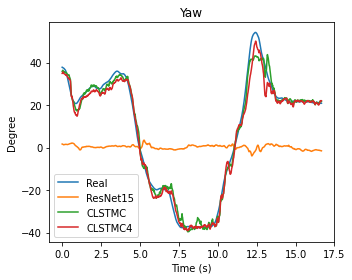

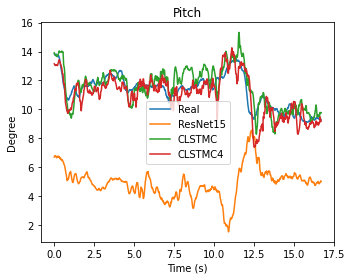

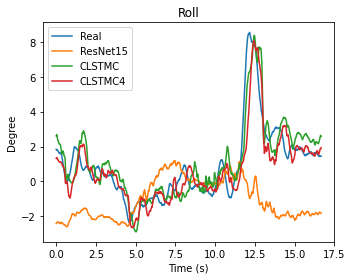

In [64]:
S = 60 * j
j += 1
L = 1000
height = 5
width = 4

T = np.linspace(0, L / 60, L)

plt.figure(figsize=(height, width))
plt.plot(T, ResNet15_Y[S:S+L, 0])
plt.plot(T, ResNet15_P[S:S+L, 0])
plt.plot(T, CLSTMC_P[S:S+L, 0])
plt.plot(T, CLSTMC4_P[S:S+L, 0])
plt.legend(['Real', 'ResNet15', 'CLSTMC', 'CLSTMC4'])
plt.xlabel('Time (s)')
plt.ylabel('Degree')
plt.title('Yaw')
plt.tight_layout()
plt.savefig('img/1130/TrainingResult_1000-Yaw.png')
plt.show()

plt.figure(figsize=(height, width))
plt.plot(T, ResNet15_Y[S:S+L, 1])
plt.plot(T, ResNet15_P[S:S+L, 1])
plt.plot(T, CLSTMC_P[S:S+L, 1])
plt.plot(T, CLSTMC4_P[S:S+L, 1])
plt.legend(['Real', 'ResNet15', 'CLSTMC', 'CLSTMC4'])
plt.xlabel('Time (s)')
plt.ylabel('Degree')
plt.title('Pitch')
plt.tight_layout()
plt.savefig('img/1130/TrainingResult_1000-Pitch.png')
plt.show()

plt.figure(figsize=(height, width))
plt.plot(T, ResNet15_Y[S:S+L, 2])
plt.plot(T, ResNet15_P[S:S+L, 2])
plt.plot(T, CLSTMC_P[S:S+L, 2])
plt.plot(T, CLSTMC4_P[S:S+L, 2])
plt.legend(['Real', 'ResNet15', 'CLSTMC', 'CLSTMC4'])
plt.xlabel('Time (s)')
plt.ylabel('Degree')
plt.title('Roll')
plt.tight_layout()
plt.savefig('img/1130/TrainingResult_1000-Roll.png')
plt.show()